# Gastric Cancer Dataset Analysis:



## Dataset Overview :
-  1- Demographic and Behavioral Data (age , gender , ethnicity , geographical_location , family_history).
-  2- Lifestyle and Health Habits (smoking_habits , alcohol_consumption , dietary_habits).
-  3- Medical Conditions & Infections (helicobacter_pylori_infection , existing_conditions).
-  4-  Genetic Data (miRNA & Target Genes (mature_mirna_acc , mature_mirna_id , target_symbol , target_entrez , target_ensembl)

### 1 - Import Libraries .

In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [7]:
# Load the data 
gc = pd.read_csv("gastric_cancer_detection_dataset.csv")

### 2- Explor Data .

In [8]:
gc.shape

(212354, 29)

In [9]:
gc.head()

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,...,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,...,0.187003,0.786422,0.204816,0.561920,0.438175,0.283603,0.928244,4.324299,7.666791,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,...,0.493322,0.963989,0.498041,0.985585,0.144609,0.375375,0.103573,7.967674,1.483280,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,NaN,...,0.573560,0.666896,0.540388,0.905853,0.827279,0.350915,0.166878,3.748651,3.046783,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,...,0.261399,0.949488,0.134170,0.429935,0.935231,0.794704,0.867036,5.478298,8.811307,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,...,0.754478,0.263164,0.876767,0.650832,0.337669,0.427492,0.915804,1.809181,0.394632,0


In [10]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212354 entries, 0 to 212353
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            212354 non-null  int64  
 1   gender                         212354 non-null  object 
 2   ethnicity                      212354 non-null  object 
 3   geographical_location          212354 non-null  object 
 4   family_history                 212354 non-null  int64  
 5   smoking_habits                 212354 non-null  int64  
 6   alcohol_consumption            212354 non-null  int64  
 7   helicobacter_pylori_infection  212354 non-null  int64  
 8   dietary_habits                 212354 non-null  object 
 9   existing_conditions            169868 non-null  object 
 10  endoscopic_images              212354 non-null  object 
 11  biopsy_results                 212354 non-null  object 
 12  ct_scan                       

In [11]:
gc.describe()

,age,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
count,212354.000000,212354.000000,212354.000000,212354.000000,212354.000000,212354.000000,2.123540e+05,212354.000000,2.123540e+05,212354.000000,212354.000000,212354.000000,2.123540e+05,212354.000000,212354.000000,212354.000000,212354.000000,212354.000000
mean,53.258036,0.300564,0.399154,0.499378,0.249470,5496.117332,1.499874e+06,0.500527,4.994971e-01,0.500083,0.499895,0.500125,4.989745e-01,0.501152,0.501117,5.010346,5.000085,0.098698
std,18.984419,0.458504,0.489726,0.500001,0.432707,2596.817632,2.882585e+05,0.288757,2.888452e-01,0.288491,0.288571,0.288738,2.884995e-01,0.288874,0.288678,2.884461,2.882685,0.298257
min,20.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000007e+06,0.000005,6.089062e-07,0.000003,0.000001,0.000013,7.743957e-07,0.000008,0.000004,0.000016,0.000081,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,3252.000000,1.251177e+06,0.250034,2.486468e-01,0.249877,0.250206,0.250293,2.497943e-01,0.250322,0.251790,2.512241,2.505941,0.000000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,5491.000000,1.500324e+06,0.501302,4.998040e-01,0.500498,0.499635,0.499888,4.985230e-01,0.502228,0.501814,5.018196,5.003598,0.000000
75%,69.000000,1.000000,1.000000,1.000000,0.000000,7738.000000,1.748424e+06,0.750783,7.495843e-01,0.748769,0.749075,0.749994,7.487212e-01,0.751212,0.751860,7.508878,7.493106,0.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,9999.000000,1.999998e+06,0.999998,9.999993e-01,0.999997,0.999997,1.000000,9.999986e-01,0.999993,0.999997,9.999908,9.999987,1.000000


In [12]:
gc.columns

Index(['age', 'gender', 'ethnicity', 'geographical_location', 'family_history',
       'smoking_habits', 'alcohol_consumption',
       'helicobacter_pylori_infection', 'dietary_habits',
       'existing_conditions', 'endoscopic_images', 'biopsy_results', 'ct_scan',
       'mature_mirna_acc', 'mature_mirna_id', 'target_symbol', 'target_entrez',
       'target_ensembl', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum',
       'label'],
      dtype='object')

### 3- Data Preprocessing (Data Cleaning & Preparation).

#### 1- Check the missing values :


In [13]:
gc.isnull().sum()

age                                  0
gender                               0
ethnicity                            0
geographical_location                0
family_history                       0
smoking_habits                       0
alcohol_consumption                  0
helicobacter_pylori_infection        0
dietary_habits                       0
existing_conditions              42486
endoscopic_images                    0
biopsy_results                       0
ct_scan                              0
mature_mirna_acc                     0
mature_mirna_id                      0
target_symbol                        0
target_entrez                        0
target_ensembl                       0
diana_microt                         0
elmmo                                0
microcosm                            0
miranda                              0
mirdb                                0
pictar                               0
pita                                 0
targetscan               

#### 2- Check the duplicate columns:


In [14]:
gc.duplicated().sum()

np.int64(0)

#### 3- Drop Columns :

- We don’t need both the id and accession number for our analysis or modeling so we will drop the mature_mirna_acc column because is more interpretable for human readers and is preferred in plots, reports, and publications.

In [15]:
gc["mature_mirna_id"].value_counts()

mature_mirna_id
MIR123_1    148248
MIR234_2     42780
MIR345_3     21326
Name: count, dtype: int64

In [16]:
gc["mature_mirna_acc"].value_counts()

mature_mirna_acc
MIR123    148596
MIR234     42474
MIR345     21284
Name: count, dtype: int64

In [17]:
gc.copy()

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,...,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,...,0.187003,0.786422,0.204816,0.561920,0.438175,0.283603,0.928244,4.324299,7.666791,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,...,0.493322,0.963989,0.498041,0.985585,0.144609,0.375375,0.103573,7.967674,1.483280,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,NaN,...,0.573560,0.666896,0.540388,0.905853,0.827279,0.350915,0.166878,3.748651,3.046783,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,...,0.261399,0.949488,0.134170,0.429935,0.935231,0.794704,0.867036,5.478298,8.811307,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,...,0.754478,0.263164,0.876767,0.650832,0.337669,0.427492,0.915804,1.809181,0.394632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212349,47,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Chronic Gastritis,...,0.408123,0.925035,0.267628,0.538474,0.463471,0.827892,0.929147,0.866260,6.698303,0
212350,59,Female,Ethnicity_A,California,0,1,1,0,High_Salt,Chronic Gastritis,...,0.578204,0.768279,0.339168,0.236523,0.444216,0.011762,0.053098,5.102216,2.338017,0
212351,58,Female,Ethnicity_C,California,0,0,0,0,High_Salt,NaN,...,0.940936,0.865221,0.448189,0.899351,0.766615,0.098454,0.384019,7.774612,4.601637,1
212352,77,Female,Ethnicity_B,California,1,1,0,1,High_Salt,Chronic Gastritis,...,0.498088,0.048195,0.924610,0.101521,0.464988,0.639401,0.410327,2.362698,2.020047,0


In [18]:
# Drop the mature_mirna_acc column.
gc.drop(columns = ['mature_mirna_acc'] , inplace = True )

In [19]:
# Check the dimention. 
gc.shape

(212354, 28)

#### 4. Encode Categorical Data 

- Gender Column : Patient's gender (Male/Female) . It Can influence patterns of cancer incidence .

In [20]:
# counting the values in gender column befor encoding .
gc["gender"].value_counts()

gender
Male      148706
Female     63648
Name: count, dtype: int64

In [21]:
# gender Encoding ( male : 0 , Female : 1 ).
gc["gender"] = gc["gender"].map({'Female' : 1 , 'Male' : 0 })

# Check the column after the encoding.
gc["gender"].value_counts()

gender
0    148706
1     63648
Name: count, dtype: int64

- Ethnicity Column : Ethnic background and it helps in analyzing genetic and environmental influence

In [22]:
# counting the values in ethnicity column befor encoding .
gc["ethnicity"].value_counts()

ethnicity
Ethnicity_A    127571
Ethnicity_B     63569
Ethnicity_C     21214
Name: count, dtype: int64

In [23]:
# Ethnicity Encoding (Ethnicity_A : 0 ,Ethnicity_B : 1 ,Ethnicity_C : 2 )
gc["ethnicity"] = gc["ethnicity"].replace({"Ethnicity_A" : 0 , "Ethnicity_B" : 1 , "Ethnicity_C" : 2})

# Check the column after the encoding.
gc["ethnicity"].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_6776\931254487.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gc["ethnicity"] = gc["ethnicity"].replace({"Ethnicity_A" : 0 , "Ethnicity_B" : 1 , "Ethnicity_C" : 2})


ethnicity
0    127571
1     63569
2     21214
Name: count, dtype: int64

- Geographical_Location Column : Patient's location . It is important for understanding environmental exposure, diet, and infections.

In [24]:
# counting the values in geographical_location column befor encoding .
gc["geographical_location"].value_counts()

geographical_location
California    169603
Other          42751
Name: count, dtype: int64

In [25]:
# Geographical_Location Encoding (California : 1 , Other : 0)
gc["geographical_location"] = gc["geographical_location"].replace({"California" : 1 , "Other" : 0})

# Check the column after the encoding.
gc["geographical_location"].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_6776\3088875847.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gc["geographical_location"] = gc["geographical_location"].replace({"California" : 1 , "Other" : 0})


geographical_location
1    169603
0     42751
Name: count, dtype: int64

- Dietary_Habits Column : Eating patterns ( high or low salt) aand Dietary habits affect gut health and microbiome balan.

In [26]:
# counting the values in dietary_habits column befor encoding .
gc["dietary_habits"].value_counts()

dietary_habits
High_Salt    169805
Low_Salt      42549
Name: count, dtype: int64

In [27]:
# dietary_habits Encoding (low salt : 0 , high salt : 1).
gc["dietary_habits"] = gc["dietary_habits"].replace({'High_Salt' : 1 , 'Low_Salt' : 0})

# Check the column after the encoding. 
gc["dietary_habits"].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_6776\4127989235.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gc["dietary_habits"] = gc["dietary_habits"].replace({'High_Salt' : 1 , 'Low_Salt' : 0})


dietary_habits
1    169805
0     42549
Name: count, dtype: int64

- Existing_Conditions Column : Pre-existing conditions (e.g., gastritis, diabetes). It Helps understand overall health and risk factors.

In [42]:
# counting the values in existing_conditions column befor encoding .
gc["existing_conditions"].value_counts()

existing_conditions
2.0    106309
1.0     63559
Name: count, dtype: int64

In [44]:
#  Replacing the value "None" in the 'existing_conditions' column with "No_exist" 
# to make it more descriptive and avoid confusion with actual missing values (NaN).
gc["existing_conditions"] = gc["existing_conditions"].replace({"None" : "No_exist"})

# Check the column after replace the value "None".
gc["existing_conditions"].value_counts()

existing_conditions
2.0    106309
1.0     63559
Name: count, dtype: int64

In [46]:
# existing_conditions encoding (No_exist : 0 , Diabetes : 1 , Chronic Gastritis : 2 )
gc["existing_conditions"] = gc["existing_conditions"].map({"No_exist" : 0 , "Diabetes" : 1 , "Chronic Gastritis" : 2})

# Check the column after the encoding. 
gc["existing_conditions"].value_counts()

Series([], Name: count, dtype: int64)

- Endoscopic_Images Column : Endoscopy results (Normal/Abnormal) . Key diagnostic tool for detecting cancer.

In [47]:
# counting the values in endoscopic_images column befor encoding .
gc["endoscopic_images"].value_counts() 

endoscopic_images
1    148523
0     63831
Name: count, dtype: int64

In [48]:
# Endoscopic Images Encoding (Abnormal: 0 , Normal : 1 )
gc["endoscopic_images"] = gc["endoscopic_images"].map({"Abnormal" : 0 , "Normal" : 1 })

# Check the column after the encoding. 
gc["endoscopic_images"].value_counts()

Series([], Name: count, dtype: int64)

- Biopsy_Results Column : Biopsy findings (Positive/Negative) . It Determines presence of cancer cells.

In [33]:
# counting the values in endoscopic_images column befor encoding .
gc["biopsy_results"].value_counts()

biopsy_results
Negative    191223
Positive     21131
Name: count, dtype: int64

In [49]:
# Biopsy Results Encoding (Negative : 0 , Positive : 1)
gc["biopsy_results"] = gc["biopsy_results"].map({"Negative" : 0 , "Positive" : 1})

# Check the column after the encoding.  
gc["biopsy_results"].value_counts()

Series([], Name: count, dtype: int64)

- Ct_Scan Column : CT scan results	Shows spread and staging of cancer.

In [51]:
# counting the values in ct_scan column befor encoding .
gc["ct_scan"].value_counts()

ct_scan
0    169740
1     42614
Name: count, dtype: int64

In [36]:
# Ct Scan Encoding (Negative : 0 , Positive : 1)
gc["ct_scan"] = gc["ct_scan"].map({"Negative" : 0 , "Positive" : 1})

# Check the column after the encoding.  
gc["ct_scan"].value_counts()

ct_scan
0    169740
1     42614
Name: count, dtype: int64

- Target_Symbol Column : Target gene name	The gene regulated by the miRNA . 

In [55]:
# counting the gene names that regulated by the miRNA
gc["target_symbol"].value_counts()

target_symbol
TP53    106351
CDH1     63570
KRAS     42433
Name: count, dtype: int64

- Family_Histor Column : Family history of cancer (1 = Yes/ 0 = No)	Strong indicator of genetic predisposition.

In [54]:
gc["family_history"].value_counts()

family_history
0    148528
1     63826
Name: count, dtype: int64

- Label Column : Indicates if the patient has gastric cancer (1 = Yes, 0 = No)	This is the target variable for prediction models.

In [53]:
gc["label"].value_counts()

label
0    191395
1     20959
Name: count, dtype: int64

In [52]:
# Save file after preproccesing 
gc.to_csv("cleand_gastric_cancer.csv", index=False)

# EDA


--- age ---
Mean: 53.258036109515245
Median: 50.0
Std Dev: 18.98441911143692
Skew: 0.2460370519278029
Kurtosis: -1.0959818803941246
count    212354.000000
mean         53.258036
std          18.984419
min          20.000000
25%          37.000000
50%          50.000000
75%          69.000000
max          89.000000
Name: age, dtype: float64


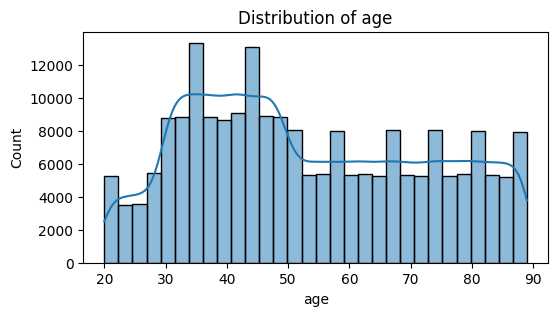

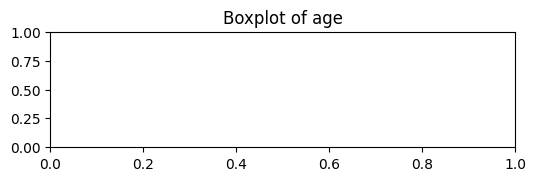


--- gender ---
Mean: 0.2997259293443966
Median: 0.0
Std Dev: 0.45813893637827763
Skew: 0.8743022738254387
Kurtosis: -1.235607171311804
count    212354.000000
mean          0.299726
std           0.458139
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: gender, dtype: float64


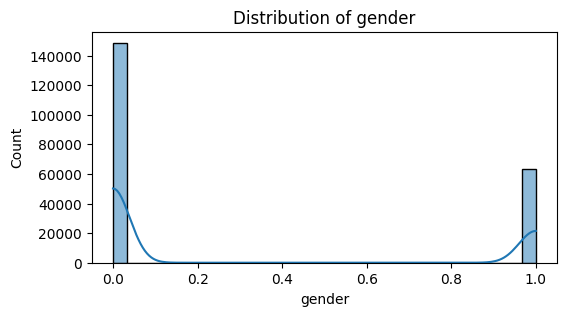

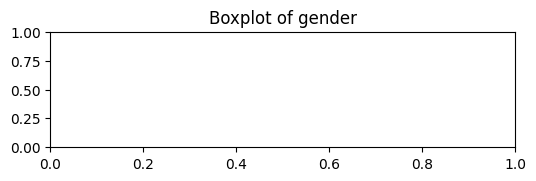


--- ethnicity ---
Mean: 0.49915235879710296
Median: 0.0
Std Dev: 0.6706711932260756
Skew: 0.9965724271631735
Kurtosis: -0.21716222024417187
count    212354.000000
mean          0.499152
std           0.670671
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: ethnicity, dtype: float64


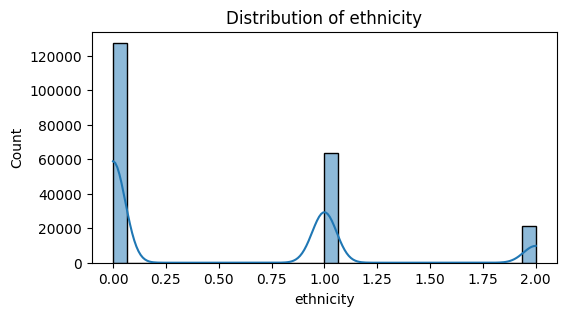

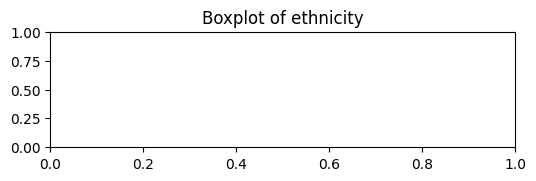


--- geographical_location ---
Mean: 0.7986805051941569
Median: 1.0
Std Dev: 0.4009871731107753
Skew: -1.4897400131125942
Kurtosis: 0.2193273722568727
count    212354.000000
mean          0.798681
std           0.400987
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: geographical_location, dtype: float64


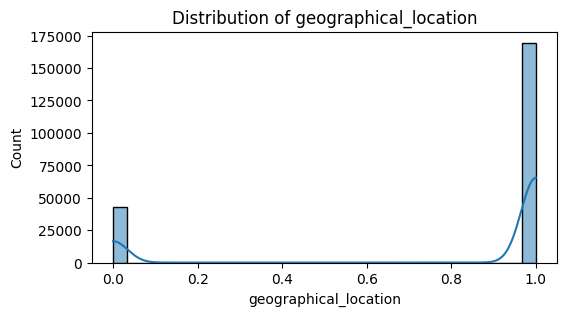

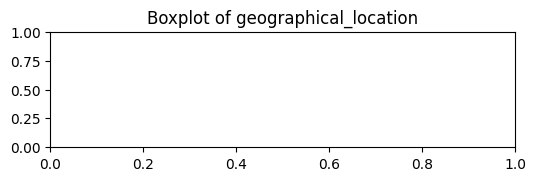


--- family_history ---
Mean: 0.3005641523117059
Median: 0.0
Std Dev: 0.4585044521456856
Skew: 0.8699489180812291
Kurtosis: -1.2432005887740305
count    212354.000000
mean          0.300564
std           0.458504
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: family_history, dtype: float64


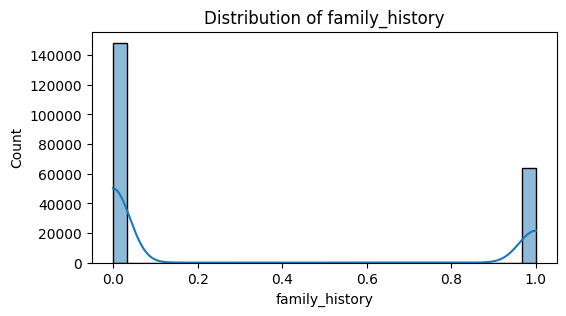

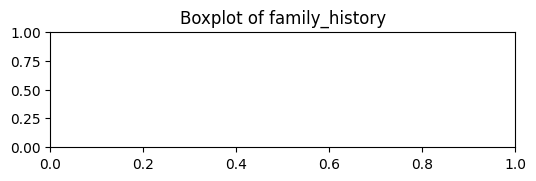


--- smoking_habits ---
Mean: 0.3991542424442205
Median: 0.0
Std Dev: 0.4897257013642096
Skew: 0.41184976435953
Kurtosis: -1.8303970107959706
count    212354.000000
mean          0.399154
std           0.489726
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: smoking_habits, dtype: float64


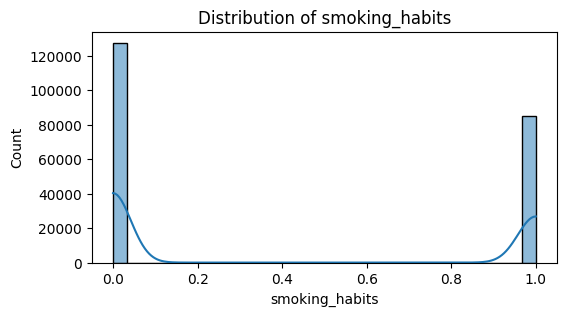

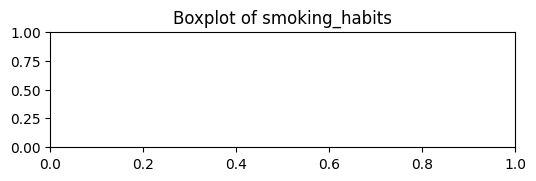


--- alcohol_consumption ---
Mean: 0.49937839645120885
Median: 0.0
Std Dev: 0.5000007908915755
Skew: 0.0024864336800209264
Kurtosis: -2.000012654326616
count    212354.000000
mean          0.499378
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: alcohol_consumption, dtype: float64


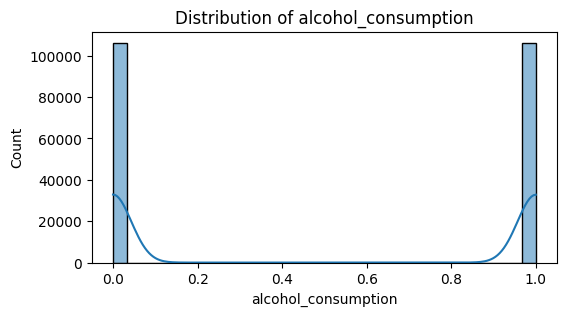

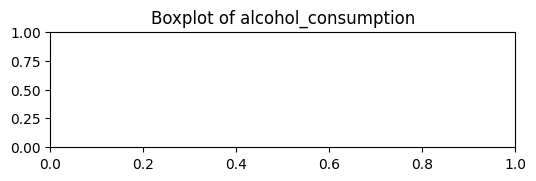


--- helicobacter_pylori_infection ---
Mean: 0.24947022424818935
Median: 0.0
Std Dev: 0.4327074221420012
Skew: 1.157974753852346
Kurtosis: -0.6591006770947563
count    212354.000000
mean          0.249470
std           0.432707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: helicobacter_pylori_infection, dtype: float64


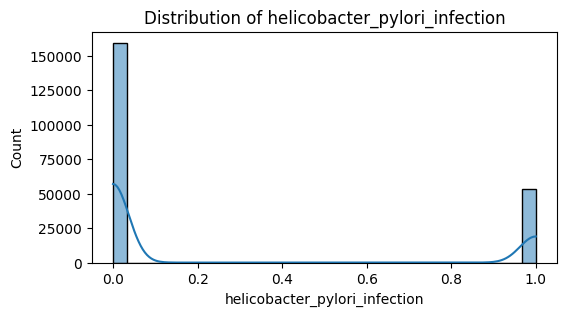

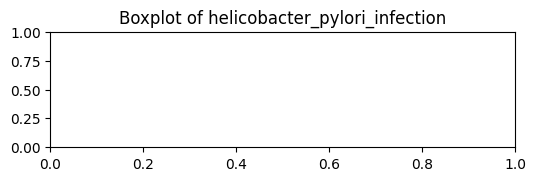


--- dietary_habits ---
Mean: 0.7996317469885191
Median: 1.0
Std Dev: 0.4002768675540188
Skew: -1.4971365737343965
Kurtosis: 0.24142019407672954
count    212354.000000
mean          0.799632
std           0.400277
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: dietary_habits, dtype: float64


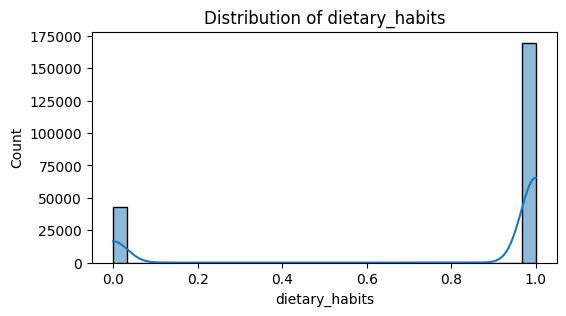

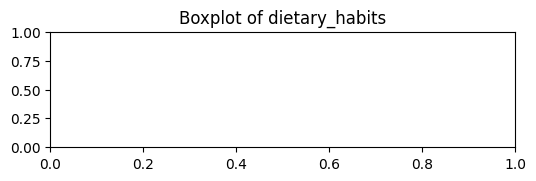


--- existing_conditions ---
Mean: nan
Median: nan
Std Dev: nan
Skew: nan
Kurtosis: nan
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: existing_conditions, dtype: float64


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


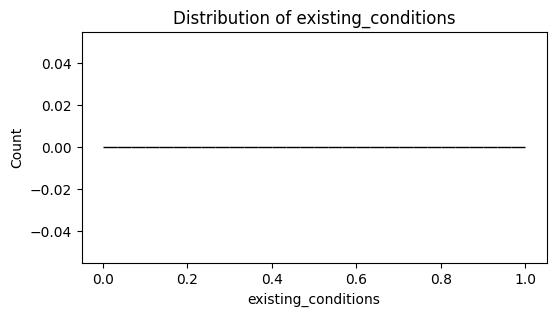

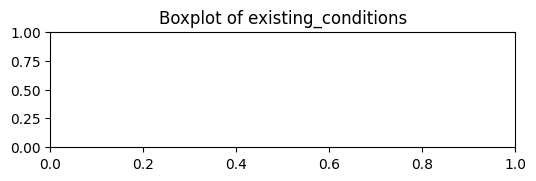


--- endoscopic_images ---
Mean: nan
Median: nan
Std Dev: nan
Skew: nan
Kurtosis: nan
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: endoscopic_images, dtype: float64


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


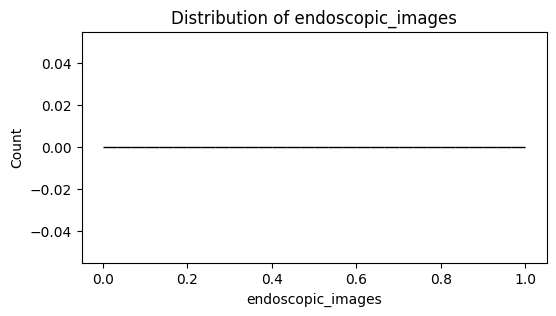

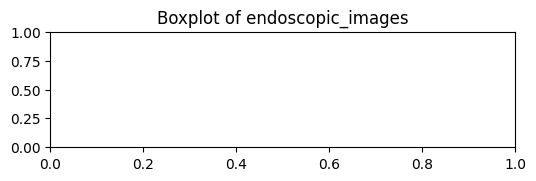


--- biopsy_results ---
Mean: nan
Median: nan
Std Dev: nan
Skew: nan
Kurtosis: nan
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: biopsy_results, dtype: float64


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


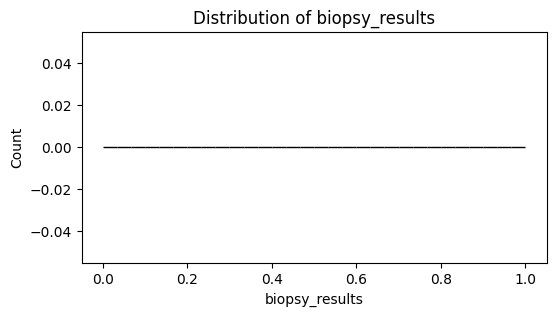

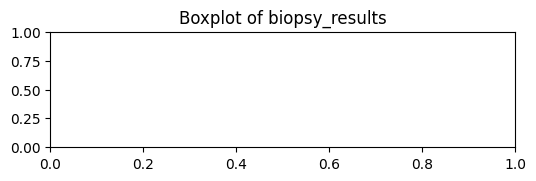


--- ct_scan ---
Mean: 0.20067434566808254
Median: 0.0
Std Dev: 0.40050581521917517
Skew: 1.4947521963654515
Kurtosis: 0.23428633501453433
count    212354.000000
mean          0.200674
std           0.400506
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ct_scan, dtype: float64


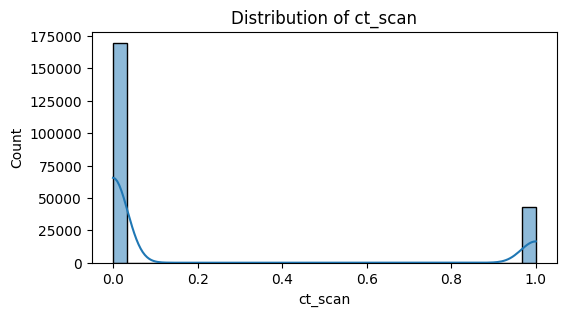

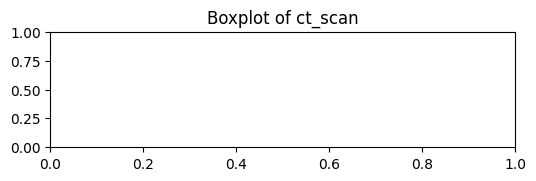


--- target_entrez ---
Mean: 5496.117332378952
Median: 5491.0
Std Dev: 2596.8176320731186
Skew: 0.0011763768651805839
Kurtosis: -1.197057245941669
count    212354.000000
mean       5496.117332
std        2596.817632
min        1000.000000
25%        3252.000000
50%        5491.000000
75%        7738.000000
max        9999.000000
Name: target_entrez, dtype: float64


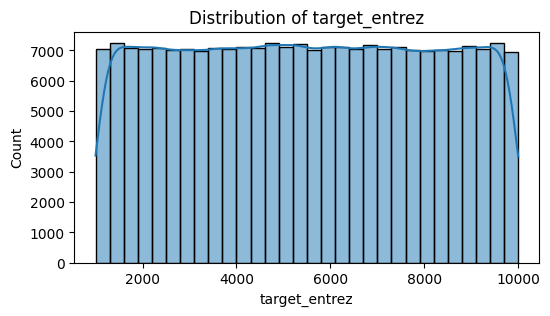

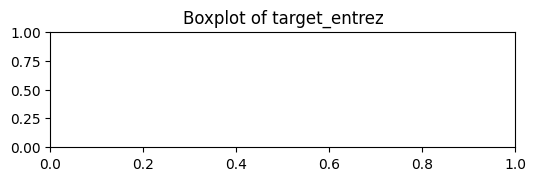


--- target_ensembl ---
Mean: 1499874.0190577996
Median: 1500323.5
Std Dev: 288258.52748630615
Skew: -0.0013157607805668145
Kurtosis: -1.1938069942851421
count    2.123540e+05
mean     1.499874e+06
std      2.882585e+05
min      1.000007e+06
25%      1.251177e+06
50%      1.500324e+06
75%      1.748424e+06
max      1.999998e+06
Name: target_ensembl, dtype: float64


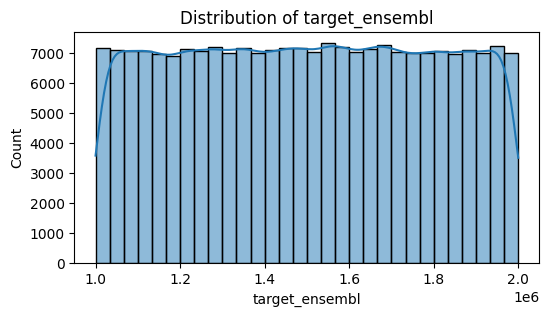

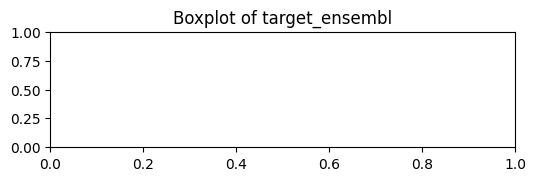


--- diana_microt ---
Mean: 0.5005268839028845
Median: 0.5013017862967815
Std Dev: 0.28875716199690654
Skew: -0.0032353963375143587
Kurtosis: -1.201304696355757
count    212354.000000
mean          0.500527
std           0.288757
min           0.000005
25%           0.250034
50%           0.501302
75%           0.750783
max           0.999998
Name: diana_microt, dtype: float64


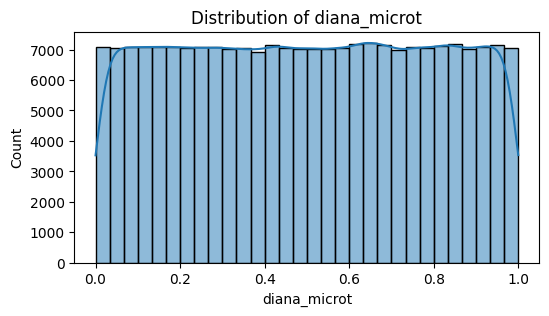

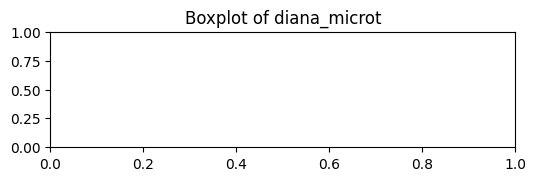


--- elmmo ---
Mean: 0.4994971240374813
Median: 0.4998039579961825
Std Dev: 0.28884517285117134
Skew: 0.0023044896323389454
Kurtosis: -1.200681278598862
count    2.123540e+05
mean     4.994971e-01
std      2.888452e-01
min      6.089062e-07
25%      2.486468e-01
50%      4.998040e-01
75%      7.495843e-01
max      9.999993e-01
Name: elmmo, dtype: float64


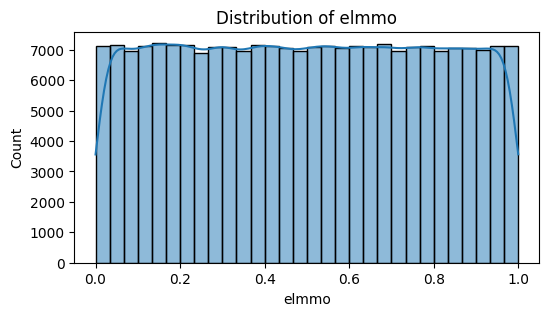

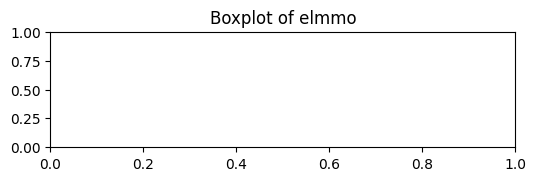


--- microcosm ---
Mean: 0.500083262922796
Median: 0.5004980131410546
Std Dev: 0.28849093093261235
Skew: -0.00043232698141531644
Kurtosis: -1.196869116772676
count    212354.000000
mean          0.500083
std           0.288491
min           0.000003
25%           0.249877
50%           0.500498
75%           0.748769
max           0.999997
Name: microcosm, dtype: float64


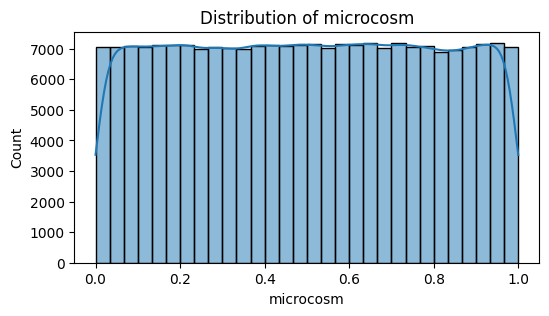

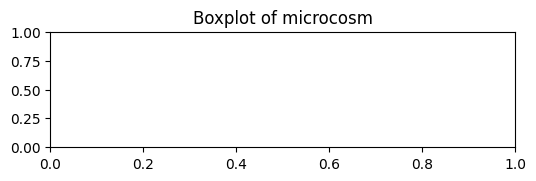


--- miranda ---
Mean: 0.4998946992816922
Median: 0.49963469064754107
Std Dev: 0.2885711381541824
Skew: -0.000470226891396864
Kurtosis: -1.198774491894168
count    212354.000000
mean          0.499895
std           0.288571
min           0.000001
25%           0.250206
50%           0.499635
75%           0.749075
max           0.999997
Name: miranda, dtype: float64


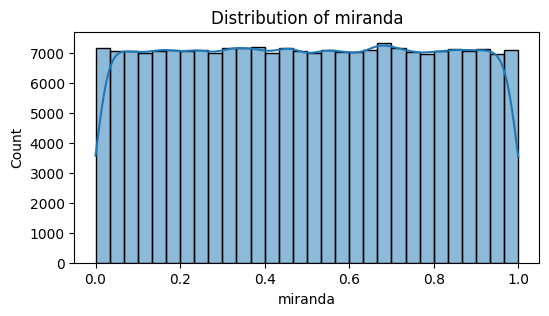

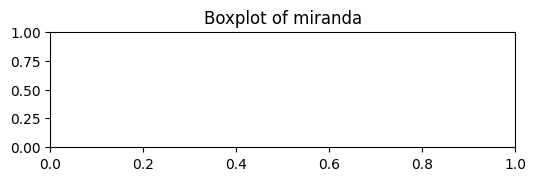


--- mirdb ---
Mean: 0.5001251193575527
Median: 0.499887553185078
Std Dev: 0.2887382945259319
Skew: -0.0008166509150373118
Kurtosis: -1.199299678789335
count    212354.000000
mean          0.500125
std           0.288738
min           0.000013
25%           0.250293
50%           0.499888
75%           0.749994
max           1.000000
Name: mirdb, dtype: float64


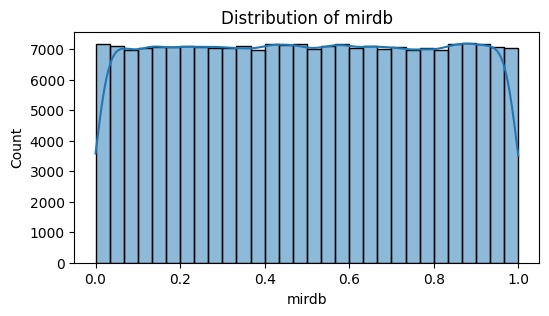

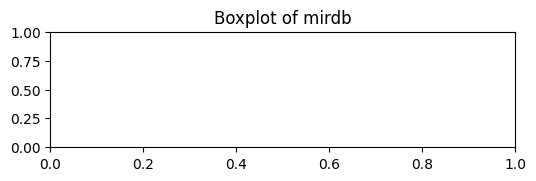


--- pictar ---
Mean: 0.4989745338697366
Median: 0.49852298221309554
Std Dev: 0.2884994892218902
Skew: 0.0046300914009759836
Kurtosis: -1.1981274817204015
count    2.123540e+05
mean     4.989745e-01
std      2.884995e-01
min      7.743957e-07
25%      2.497943e-01
50%      4.985230e-01
75%      7.487212e-01
max      9.999986e-01
Name: pictar, dtype: float64


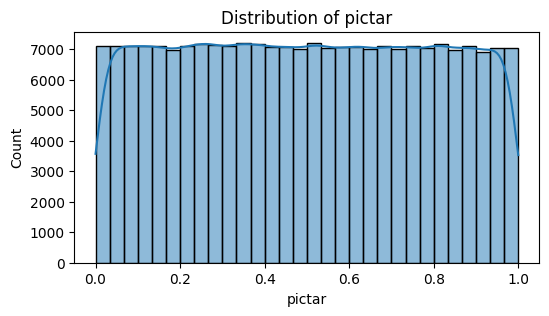

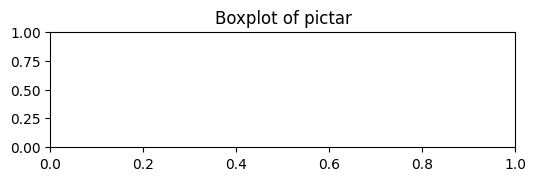


--- pita ---
Mean: 0.5011523308485906
Median: 0.5022280248035434
Std Dev: 0.2888743042501189
Skew: -0.0026835509408794315
Kurtosis: -1.2025393767547974
count    212354.000000
mean          0.501152
std           0.288874
min           0.000008
25%           0.250322
50%           0.502228
75%           0.751212
max           0.999993
Name: pita, dtype: float64


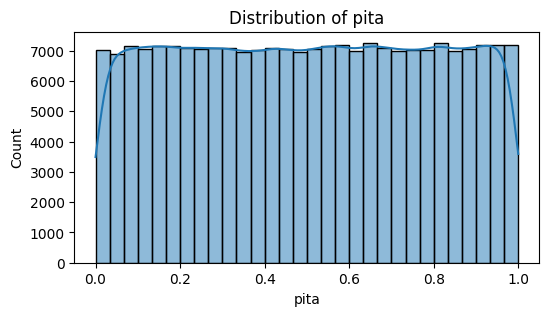

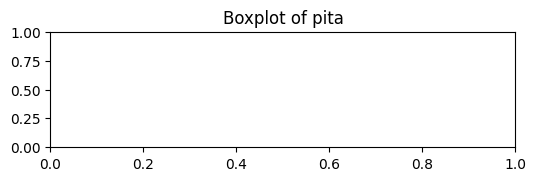


--- targetscan ---
Mean: 0.5011170038709611
Median: 0.5018138484716198
Std Dev: 0.2886779882390583
Skew: -0.005086113134642128
Kurtosis: -1.2000674858725653
count    212354.000000
mean          0.501117
std           0.288678
min           0.000004
25%           0.251790
50%           0.501814
75%           0.751860
max           0.999997
Name: targetscan, dtype: float64


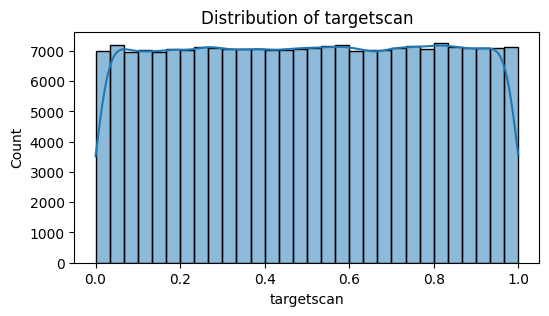

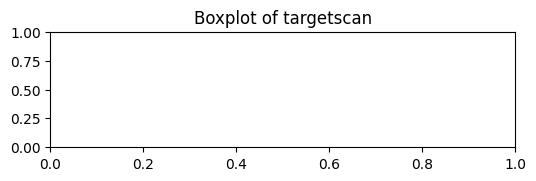


--- predicted.sum ---
Mean: 5.0103461861535905
Median: 5.018195606121572
Std Dev: 2.884460669968857
Skew: -0.004771074783120903
Kurtosis: -1.197591979180318
count    212354.000000
mean          5.010346
std           2.884461
min           0.000016
25%           2.512241
50%           5.018196
75%           7.508878
max           9.999908
Name: predicted.sum, dtype: float64


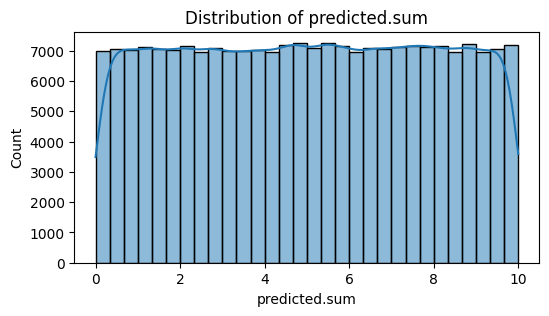

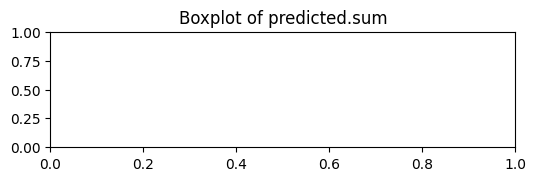


--- all.sum ---
Mean: 5.000085145999059
Median: 5.0035976997803155
Std Dev: 2.8826846919480364
Skew: -0.0023108605565824994
Kurtosis: -1.197047879534399
count    212354.000000
mean          5.000085
std           2.882685
min           0.000081
25%           2.505941
50%           5.003598
75%           7.493106
max           9.999987
Name: all.sum, dtype: float64


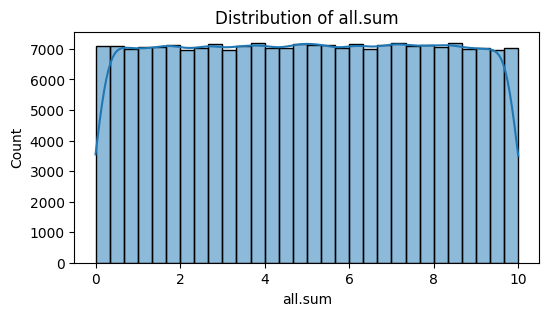

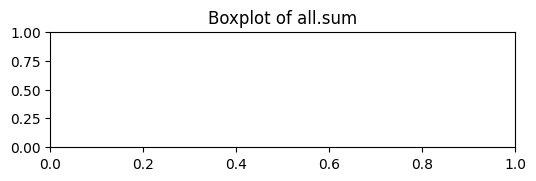

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = gc.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['label']]  # Exclude target

for col in numeric_cols:
    print(f"\n--- {col} ---")
    print("Mean:", gc[col].mean())
    print("Median:", gc[col].median())
    print("Std Dev:", gc[col].std())
    print("Skew:", gc[col].skew())
    print("Kurtosis:", gc[col].kurtosis())
    print(gc[col].describe())
    
    plt.figure(figsize=(6, 3))
    sns.histplot(gc[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    plt.figure(figsize=(6, 1.5))
    # sns.boxplot(x=gc[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [78]:
cat_cols = gc.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['mature_mirna_id', 'target_symbol', 'target_ensembl']]  # Possibly drop IDs

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(gc[col].value_counts(dropna=False).head(10))
    
    plt.figure(figsize=(8, 4))
    sns.countplot(y=gc[col], order=gc[col].value_counts().iloc[:10].index)
    plt.title(f"Top Categories in {col}")
    plt.show()



--- diana_microt ---
count    212354.000000
mean          0.500527
std           0.288757
min           0.000005
25%           0.250034
50%           0.501302
75%           0.750783
max           0.999998
Name: diana_microt, dtype: float64


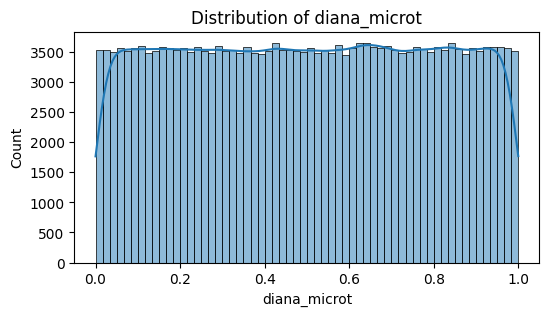


--- elmmo ---
count    2.123540e+05
mean     4.994971e-01
std      2.888452e-01
min      6.089062e-07
25%      2.486468e-01
50%      4.998040e-01
75%      7.495843e-01
max      9.999993e-01
Name: elmmo, dtype: float64


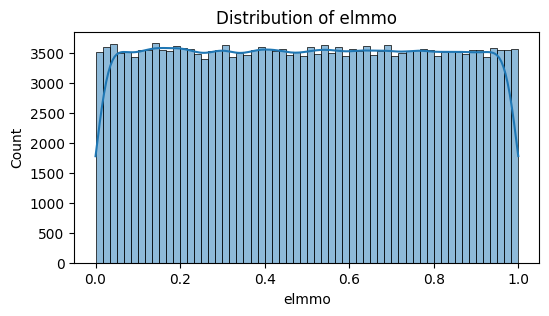


--- microcosm ---
count    212354.000000
mean          0.500083
std           0.288491
min           0.000003
25%           0.249877
50%           0.500498
75%           0.748769
max           0.999997
Name: microcosm, dtype: float64


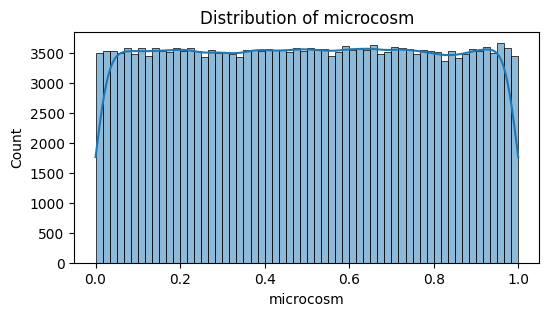


--- miranda ---
count    212354.000000
mean          0.499895
std           0.288571
min           0.000001
25%           0.250206
50%           0.499635
75%           0.749075
max           0.999997
Name: miranda, dtype: float64


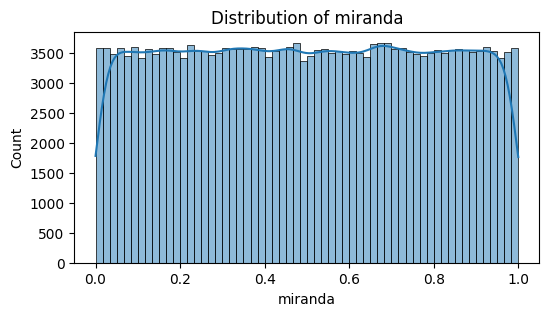


--- mirdb ---
count    212354.000000
mean          0.500125
std           0.288738
min           0.000013
25%           0.250293
50%           0.499888
75%           0.749994
max           1.000000
Name: mirdb, dtype: float64


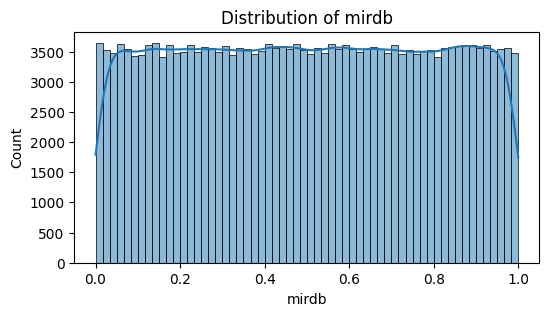


--- pictar ---
count    2.123540e+05
mean     4.989745e-01
std      2.884995e-01
min      7.743957e-07
25%      2.497943e-01
50%      4.985230e-01
75%      7.487212e-01
max      9.999986e-01
Name: pictar, dtype: float64


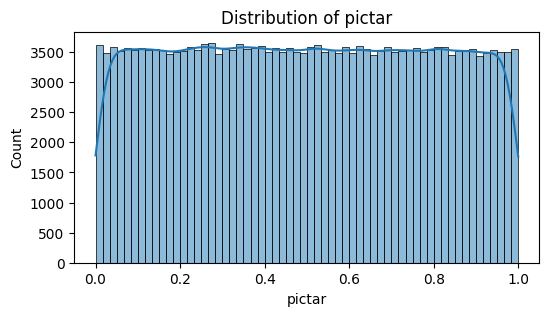


--- pita ---
count    212354.000000
mean          0.501152
std           0.288874
min           0.000008
25%           0.250322
50%           0.502228
75%           0.751212
max           0.999993
Name: pita, dtype: float64


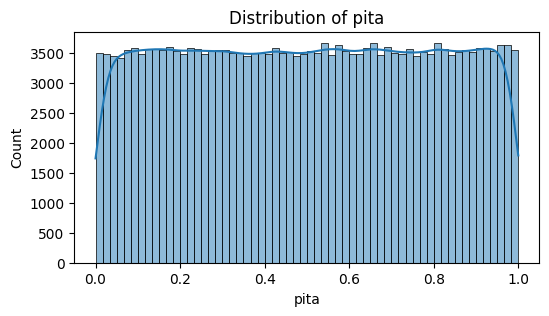


--- targetscan ---
count    212354.000000
mean          0.501117
std           0.288678
min           0.000004
25%           0.251790
50%           0.501814
75%           0.751860
max           0.999997
Name: targetscan, dtype: float64


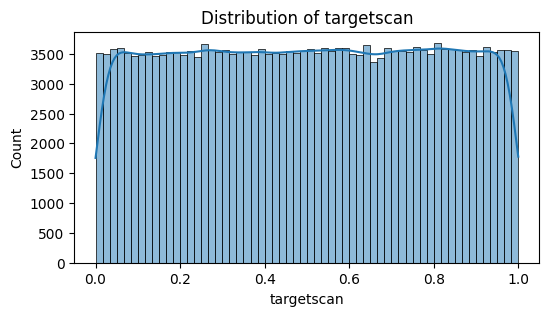


--- predicted.sum ---
count    212354.000000
mean          5.010346
std           2.884461
min           0.000016
25%           2.512241
50%           5.018196
75%           7.508878
max           9.999908
Name: predicted.sum, dtype: float64


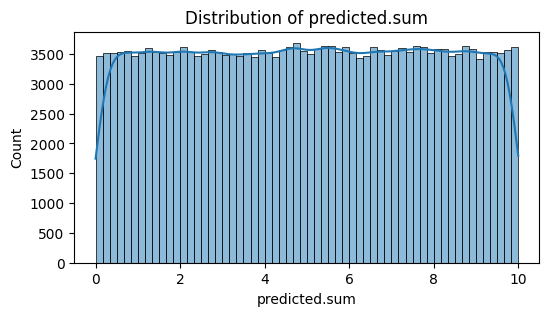


--- all.sum ---
count    212354.000000
mean          5.000085
std           2.882685
min           0.000081
25%           2.505941
50%           5.003598
75%           7.493106
max           9.999987
Name: all.sum, dtype: float64


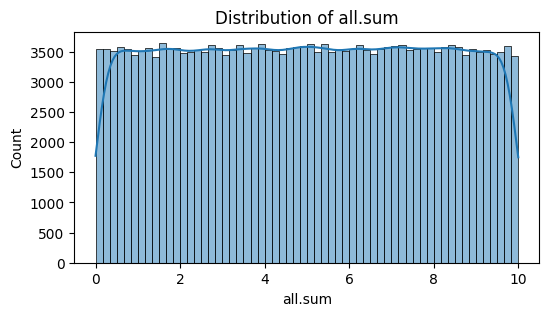

In [77]:
mirna_cols = ['diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum']

for col in mirna_cols:
    print(f"\n--- {col} ---")
    print(gc[col].describe())
    
    plt.figure(figsize=(6, 3))
    sns.histplot(gc[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


label
0    191395
1     20959
Name: count, dtype: int64


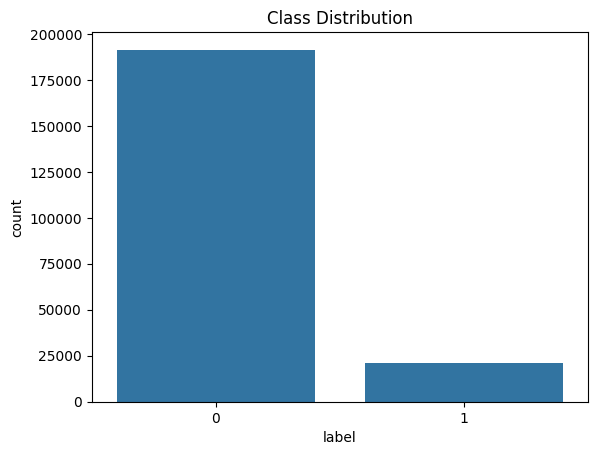

In [79]:
print(gc['label'].value_counts())
sns.countplot(x='label', data=gc)
plt.title("Class Distribution")
plt.show()


In [86]:
gc.columns

Index(['age', 'gender', 'ethnicity', 'geographical_location', 'family_history',
       'smoking_habits', 'alcohol_consumption',
       'helicobacter_pylori_infection', 'dietary_habits',
       'existing_conditions', 'endoscopic_images', 'biopsy_results', 'ct_scan',
       'mature_mirna_id', 'target_symbol', 'target_entrez', 'target_ensembl',
       'diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar',
       'pita', 'targetscan', 'predicted.sum', 'all.sum', 'label'],
      dtype='object')

In [90]:
# List of prediction tool columns
prediction_tools = ['target_entrez', 'target_ensembl','diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita', 'targetscan']

# Summary statistics
print(gc[prediction_tools].describe())


       target_entrez  target_ensembl   diana_microt         elmmo  \
count  212354.000000    2.123540e+05  212354.000000  2.123540e+05   
mean     5496.117332    1.499874e+06       0.500527  4.994971e-01   
std      2596.817632    2.882585e+05       0.288757  2.888452e-01   
min      1000.000000    1.000007e+06       0.000005  6.089062e-07   
25%      3252.000000    1.251177e+06       0.250034  2.486468e-01   
50%      5491.000000    1.500324e+06       0.501302  4.998040e-01   
75%      7738.000000    1.748424e+06       0.750783  7.495843e-01   
max      9999.000000    1.999998e+06       0.999998  9.999993e-01   

           microcosm        miranda          mirdb        pictar  \
count  212354.000000  212354.000000  212354.000000  2.123540e+05   
mean        0.500083       0.499895       0.500125  4.989745e-01   
std         0.288491       0.288571       0.288738  2.884995e-01   
min         0.000003       0.000001       0.000013  7.743957e-07   
25%         0.249877       0.250206   

In [138]:
gc.shape

(212354, 28)

In [145]:
gc.nunique()

age                                  70
gender                                2
ethnicity                             3
geographical_location                 2
family_history                        2
smoking_habits                        2
alcohol_consumption                   2
helicobacter_pylori_infection         2
dietary_habits                        2
existing_conditions                   0
endoscopic_images                     0
biopsy_results                        0
ct_scan                               2
mature_mirna_id                       3
target_symbol                         3
target_entrez                      9000
target_ensembl                   191184
diana_microt                     212354
elmmo                            212354
microcosm                        212354
miranda                          212354
mirdb                            212354
pictar                           212354
pita                             212354
targetscan                       212354


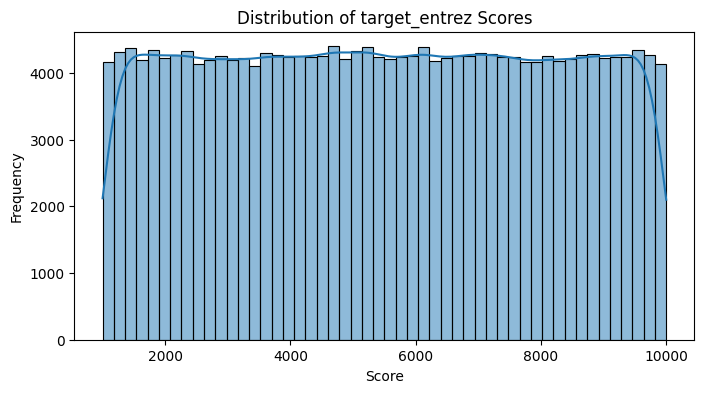

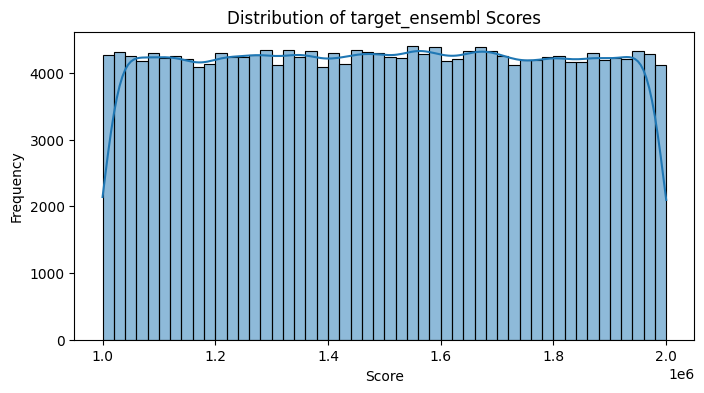

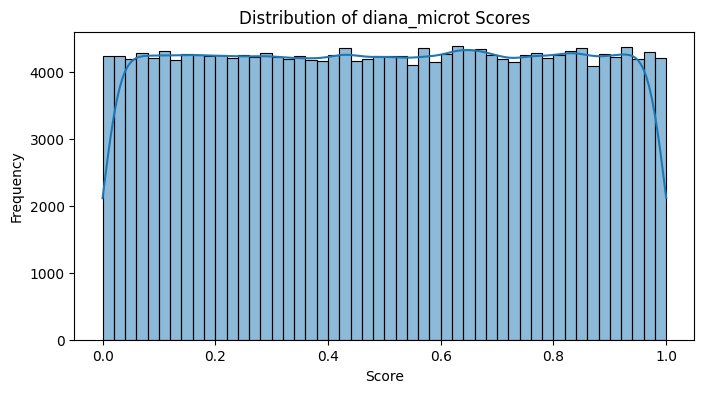

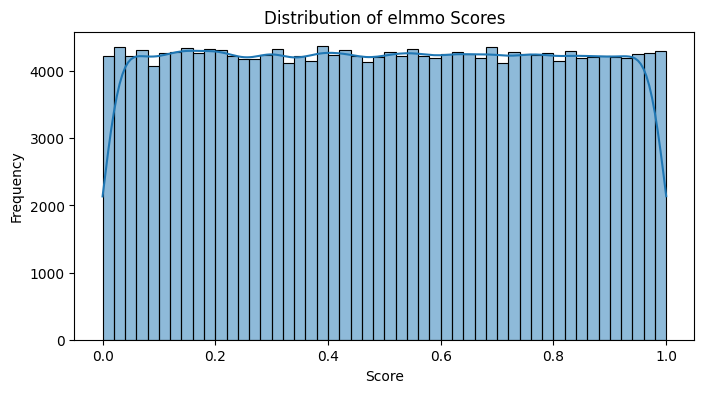

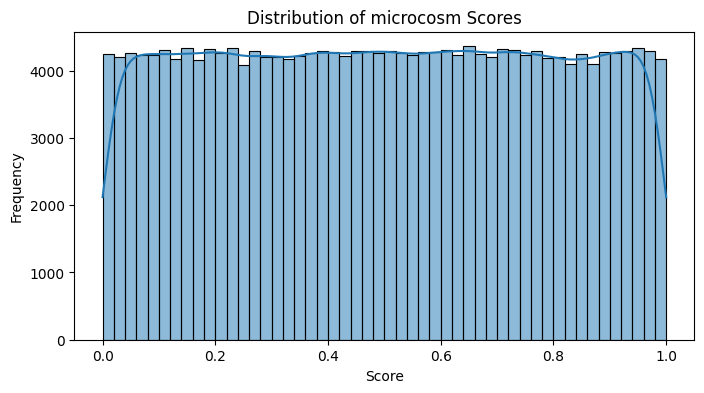

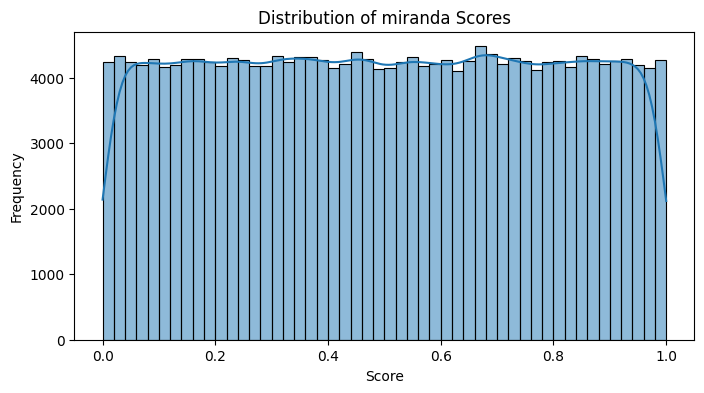

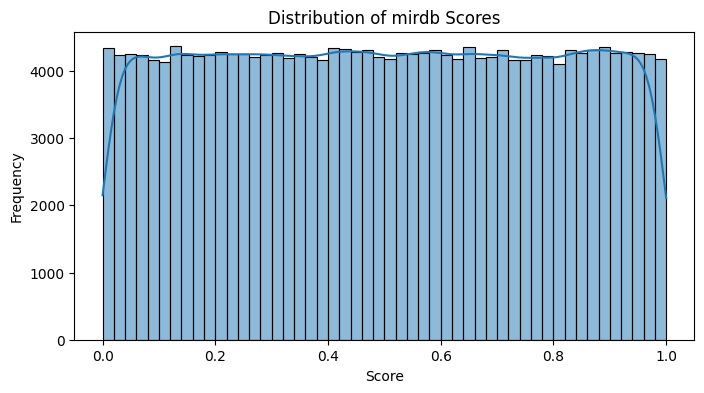

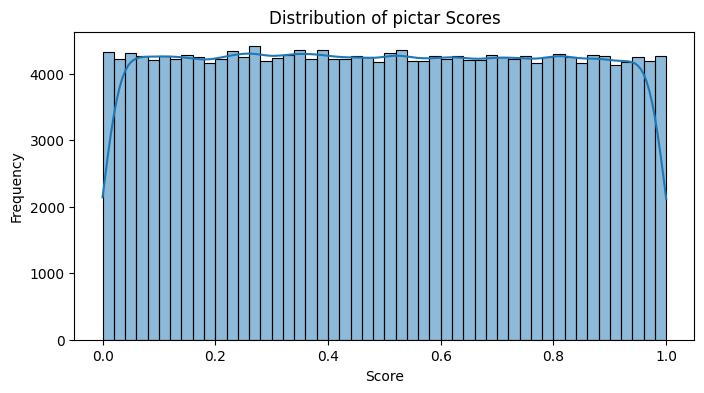

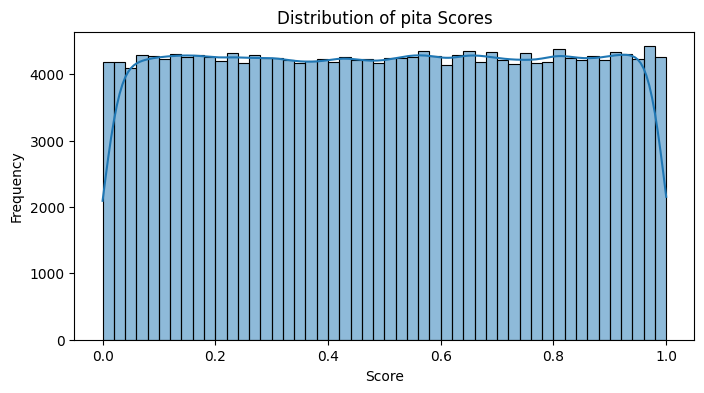

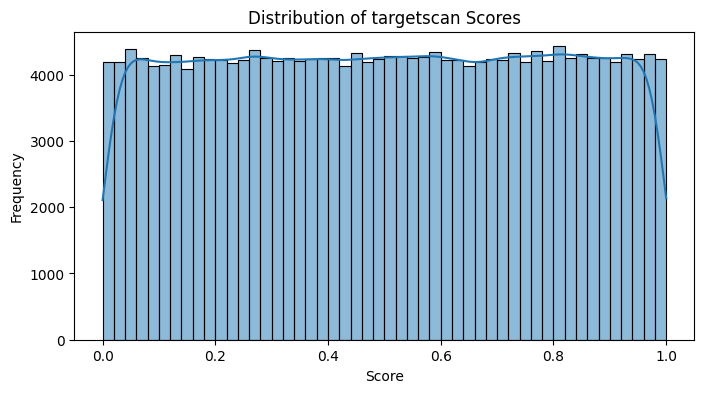

In [91]:
# Histograms for prediction scores
for tool in prediction_tools:
    plt.figure(figsize=(8, 4))
    sns.histplot(gc[tool], bins=50, kde=True)
    plt.title(f'Distribution of {tool} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()


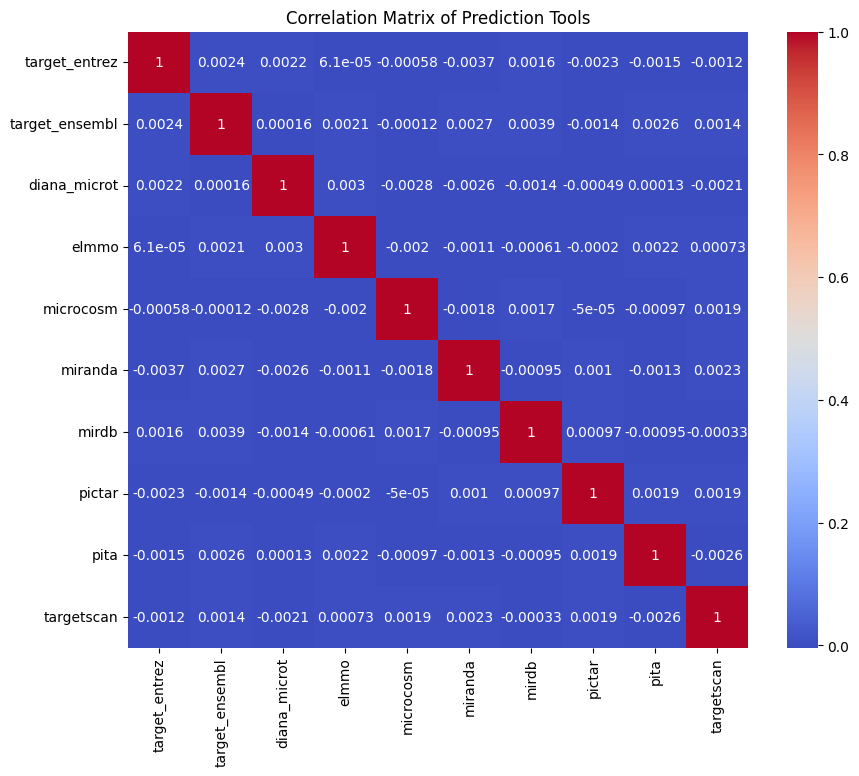

In [92]:
# Correlation between prediction tools
plt.figure(figsize=(10, 8))
sns.heatmap(gc[prediction_tools].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Prediction Tools')
plt.show()


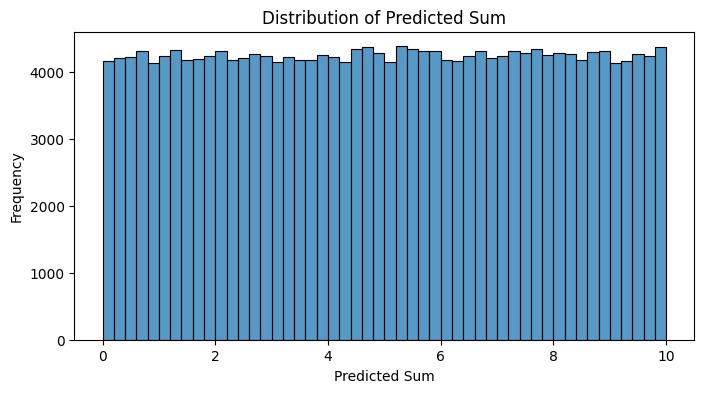

In [94]:
plt.figure(figsize=(8, 4))
sns.histplot(gc['predicted.sum'], bins=50, kde=False)  # or kde=True if you want a smooth curve
plt.title('Distribution of Predicted Sum')
plt.xlabel('Predicted Sum')
plt.ylabel('Frequency')
plt.show()


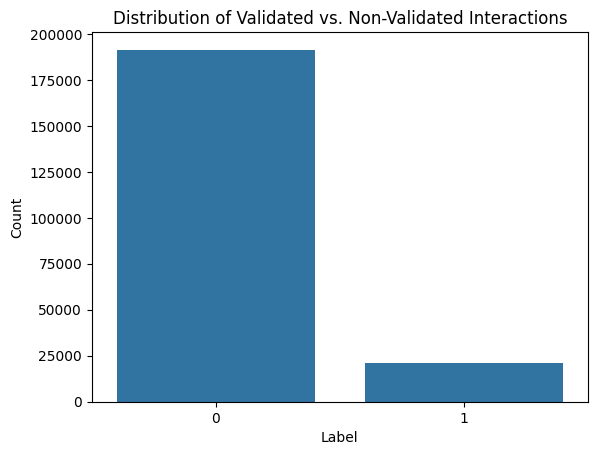

In [99]:
# Count of validated vs. non-validated interactions
sns.countplot(x='label', data=gc)
plt.title('Distribution of Validated vs. Non-Validated Interactions')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


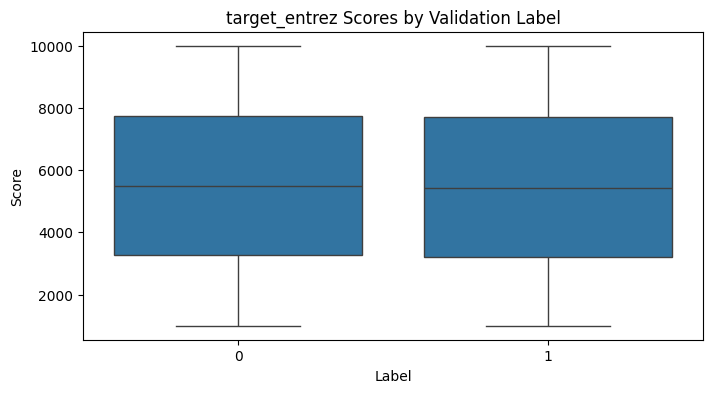

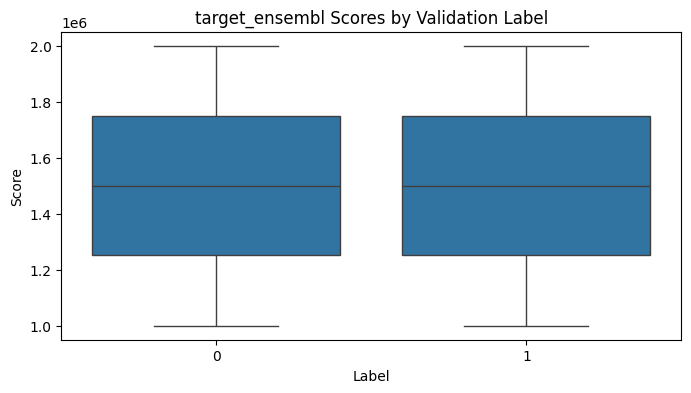

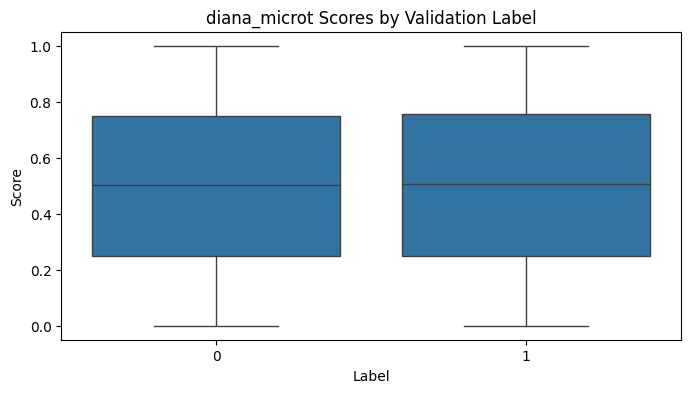

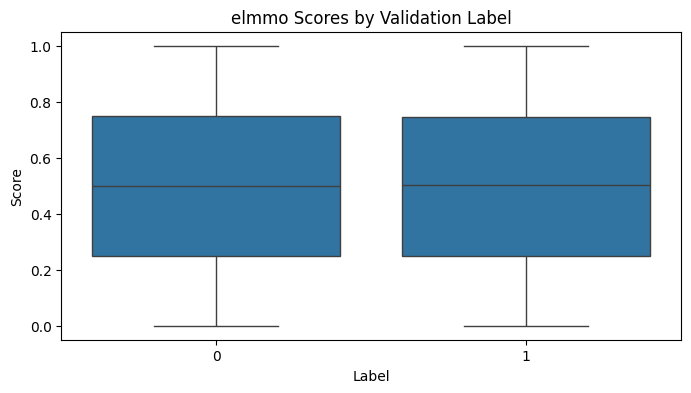

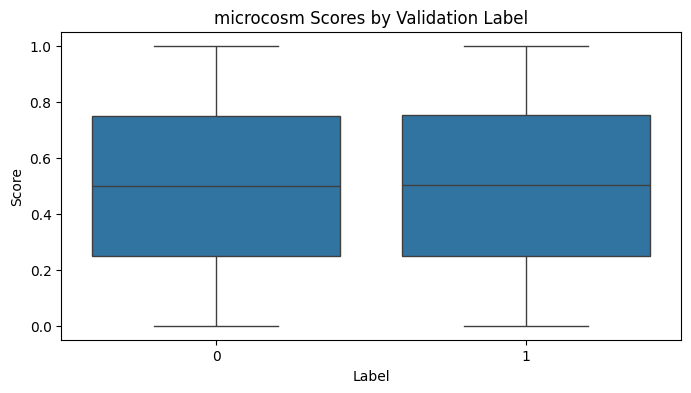

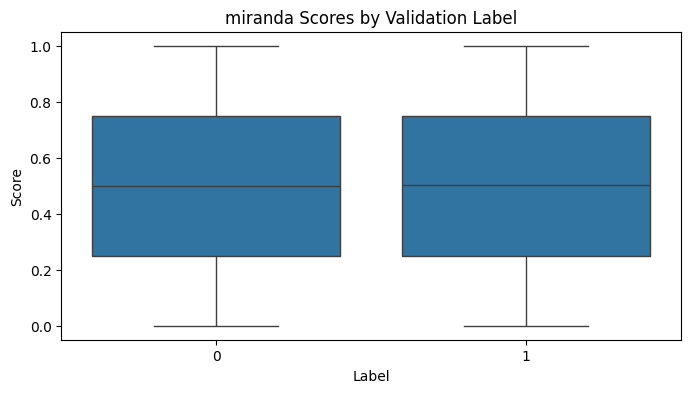

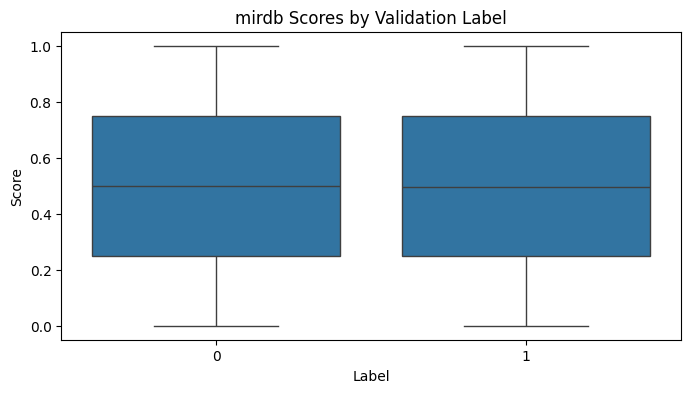

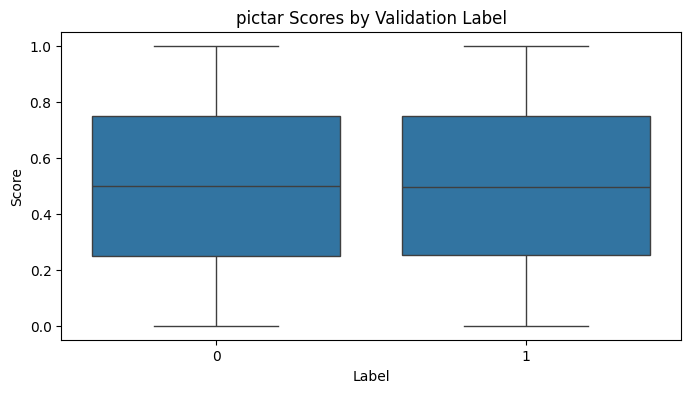

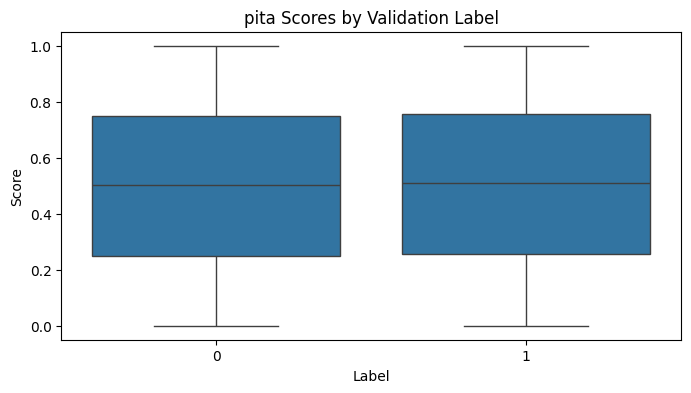

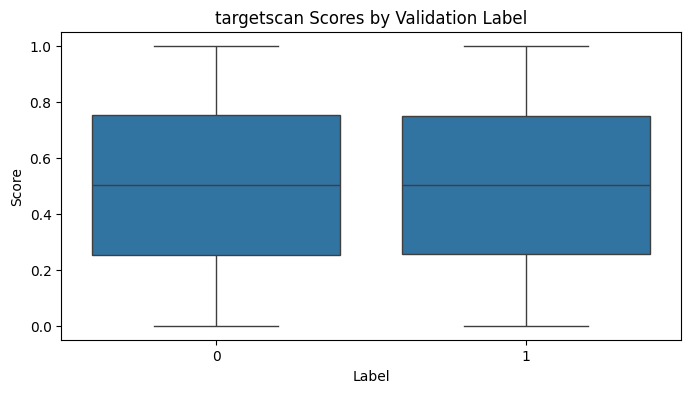

In [100]:
# Boxplots of prediction scores by label
for tool in prediction_tools:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=tool, data=gc)
    plt.title(f'{tool} Scores by Validation Label')
    plt.xlabel('Label')
    plt.ylabel('Score')
    plt.show()


In [101]:
for tool in prediction_tools:
    print(f"{tool}:\n", gc[tool].value_counts(normalize=True), "\n")


target_entrez:
 target_entrez
5737    0.000207
1341    0.000202
8008    0.000202
3530    0.000198
6519    0.000193
          ...   
9814    0.000042
6221    0.000042
3495    0.000042
3287    0.000042
8772    0.000038
Name: proportion, Length: 9000, dtype: float64 

target_ensembl:
 target_ensembl
1621017    0.000024
1686987    0.000024
1228716    0.000024
1471937    0.000024
1108334    0.000024
             ...   
1786009    0.000005
1107587    0.000005
1258626    0.000005
1877866    0.000005
1895030    0.000005
Name: proportion, Length: 191184, dtype: float64 

diana_microt:
 diana_microt
0.146955    0.000005
0.381326    0.000005
0.700851    0.000005
0.593674    0.000005
0.387299    0.000005
              ...   
0.906934    0.000005
0.387300    0.000005
0.067839    0.000005
0.918927    0.000005
0.464553    0.000005
Name: proportion, Length: 212354, dtype: float64 

elmmo:
 elmmo
0.689696    0.000005
0.187003    0.000005
0.888553    0.000005
0.597434    0.000005
0.779692    0.000005
  

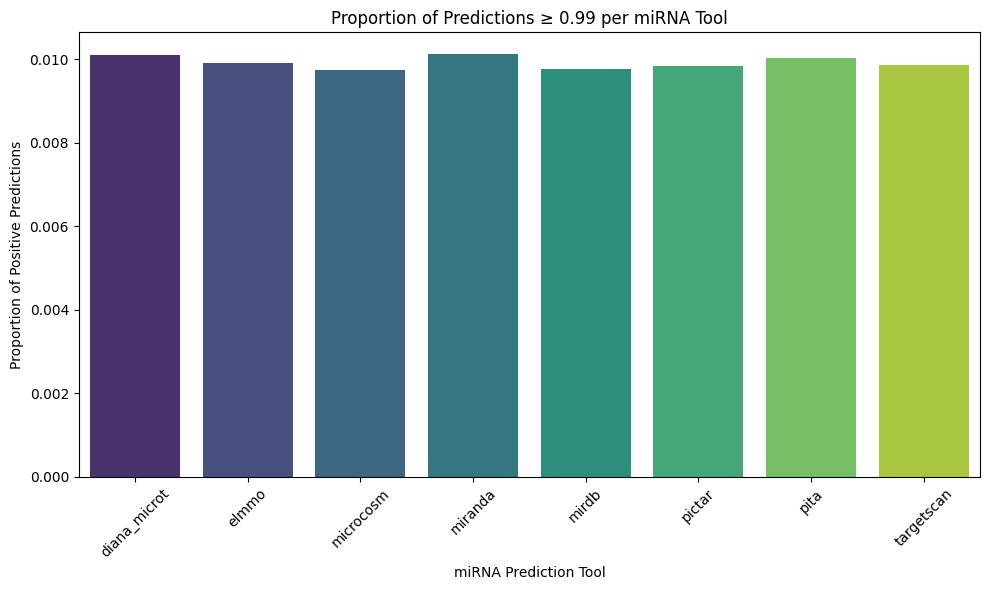


Threshold = 0.3
{'diana_microt': np.float64(0.7001327971217872), 'elmmo': np.float64(0.699181555327425), 'microcosm': np.float64(0.7003588347758931), 'miranda': np.float64(0.7006460909613194), 'mirdb': np.float64(0.7002458159488402), 'pictar': np.float64(0.6991250459138985), 'pita': np.float64(0.700434180660595), 'targetscan': np.float64(0.7012064759787902)}

Threshold = 0.5
{'diana_microt': np.float64(0.5011631520950866), 'elmmo': np.float64(0.4998116352882451), 'microcosm': np.float64(0.5004567844260056), 'miranda': np.float64(0.49968448910781055), 'mirdb': np.float64(0.49988698117294705), 'pictar': np.float64(0.4985448826016934), 'pita': np.float64(0.5021332303606243), 'targetscan': np.float64(0.5019825385912203)}

Threshold = 0.7
{'diana_microt': np.float64(0.30014974994584515), 'elmmo': np.float64(0.2989960160863464), 'microcosm': np.float64(0.2994763461013214), 'miranda': np.float64(0.29923147197604), 'mirdb': np.float64(0.29992842140953313), 'pictar': np.float64(0.2985109769535

In [111]:
mirna_tools = ['diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb',
               'pictar', 'pita', 'targetscan']

threshold = 0.99
tool_imbalance = {
    tool: (gc[tool] >= threshold).mean()
    for tool in mirna_tools
}
imbalance_df = pd.DataFrame.from_dict(tool_imbalance, orient='index', columns=['Proportion of 1s'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=imbalance_df.index, y='Proportion of 1s', data=imbalance_df.reset_index(), palette='viridis', hue=imbalance_df.index, legend=False)
plt.xticks(rotation=45)
plt.title(f'Proportion of Predictions ≥ {threshold} per miRNA Tool')
plt.ylabel('Proportion of Positive Predictions')
plt.xlabel('miRNA Prediction Tool')
plt.tight_layout()
plt.show()

for t in [0.3, 0.5, 0.7, 0.9]:
    print(f"\nThreshold = {t}")
    print({tool: (gc[tool] >= t).mean() for tool in mirna_tools})



In [121]:
for column in gc.columns:
    max_value = gc[column].max()
    print(f"Max value of {column}: {max_value}")

Max value of age: 89
Max value of gender: 1
Max value of ethnicity: 2
Max value of geographical_location: 1
Max value of family_history: 1
Max value of smoking_habits: 1
Max value of alcohol_consumption: 1
Max value of helicobacter_pylori_infection: 1
Max value of dietary_habits: 1
Max value of existing_conditions: nan
Max value of endoscopic_images: nan
Max value of biopsy_results: nan
Max value of ct_scan: 1
Max value of mature_mirna_id: MIR345_3
Max value of target_symbol: TP53
Max value of target_entrez: 9999
Max value of target_ensembl: 1999998
Max value of diana_microt: 0.99999836660366
Max value of elmmo: 0.9999993035622
Max value of microcosm: 0.9999973799350492
Max value of miranda: 0.999997217324878
Max value of mirdb: 0.9999996931683416
Max value of pictar: 0.9999986240601494
Max value of pita: 0.9999934730632368
Max value of targetscan: 0.9999966790218832
Max value of predicted.sum: 9.999908374012245
Max value of all.sum: 9.999987182465
Max value of label: 1
